### Import Libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Laod Dataset

In [3]:
df = pd.read_csv("/content/Customer_Churn.csv")
df.head()
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
df.info()

print("\nMissing values per column:\n", df.isnull().sum())

Shape: (7043, 21)

Columns:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   

### A) DATA MANIPULATION
#### Step A-a — Extract the 5th column → customer_5

In [4]:
customer_5 = df.iloc[:, 4]
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


#### Step A-b — Extract the 15th column → customer_15

In [5]:
customer_15 = df.iloc[:, 14]
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


#### Step A-c — Male senior citizens + PaymentMethod = Electronic check → senior_male_electronic

In [6]:
senior_male_electronic = df[
    (df["gender"] == "Male") &
    (df["SeniorCitizen"] == 1) &
    (df["PaymentMethod"] == "Electronic check")
]

senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


#### Step A-d — tenure > 70 OR MonthlyCharges > 100 → customer_total_tenure

In [7]:
customer_total_tenure = df[
    (df["tenure"] > 70) | (df["MonthlyCharges"] > 100)
]

customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


#### Step A-e — Contract = Two year + PaymentMethod = Mailed check + Churn = Yes → two_mail_yes

In [8]:
two_mail_yes = df[
    (df["Contract"] == "Two year") &
    (df["PaymentMethod"] == "Mailed check") &
    (df["Churn"] == "Yes")
]

two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


#### Step A-f — Extract 333 random records → customer_333

In [9]:
customer_333 = df.sample(n=333, random_state=42)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


#### Step A-g — Count levels in Churn

In [10]:
churn_counts = df["Churn"].value_counts()
churn_counts

,count
Churn,
No,5174
Yes,1869


### B) DATA VISUALIZATION

#### Step B-a — Bar plot for InternetService (orange + labels + title)

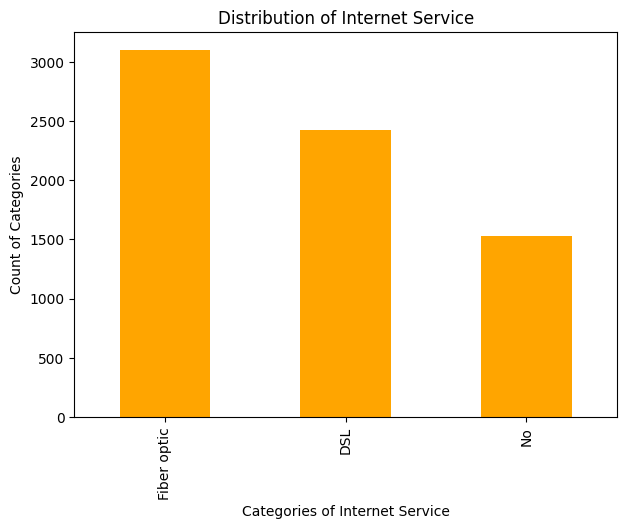

In [11]:
plt.figure(figsize=(7,5))
df["InternetService"].value_counts().plot(kind="bar", color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

#### Step B-b — Histogram for tenure (30 bins, green, title)

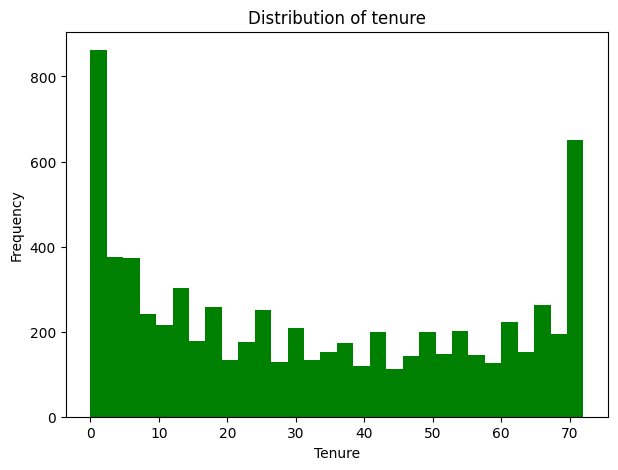

In [12]:
plt.figure(figsize=(7,5))
plt.hist(df["tenure"], bins=30, color="green")
plt.title("Distribution of tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

#### Step B-c — Scatter plot: x=tenure, y=MonthlyCharges (brown + labels + title)

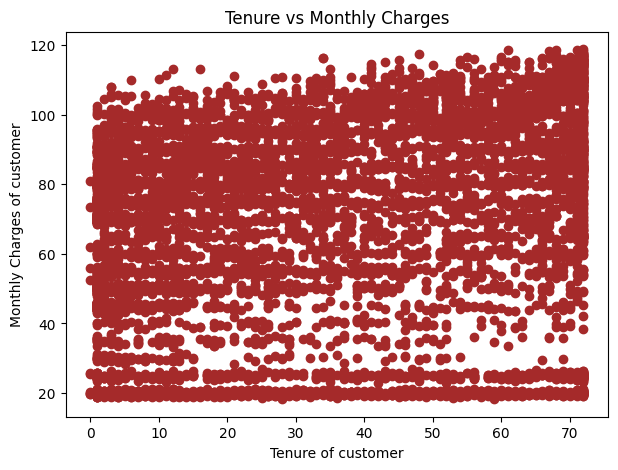

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df["tenure"], df["MonthlyCharges"], color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

#### Step B-d — Box plot: x=Contract, y=tenure

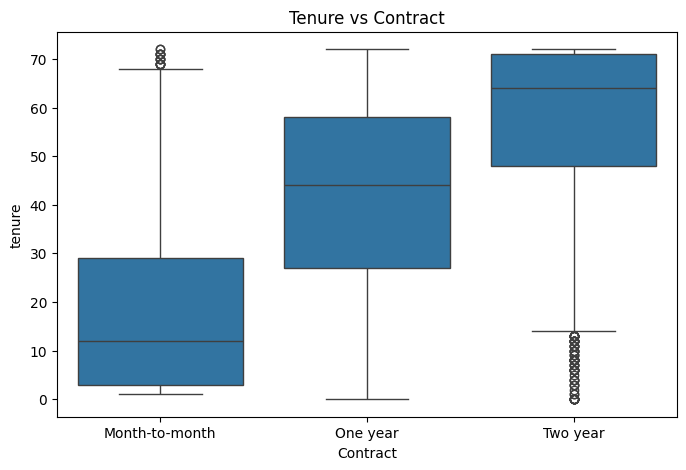

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Contract", y="tenure", data=df)
plt.title("Tenure vs Contract")
plt.show()

### C) LINEAR REGRESSION

#### Step C-1 — Prepare X and y

In [18]:
X = df[["tenure"]]            # must be 2D
y = df["MonthlyCharges"]

#### Step C-2 — Train-test split (70:30)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

#### Step C-3 — Train model + predict

In [22]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

#### Step C-4 — Error and RMSE

In [23]:
error = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
error.head()

RMSE: 29.07936015646814


,MonthlyCharges
185,-30.306590
2715,-42.185209
3825,-51.475579
1807,21.243410
132,-24.898812


### D) LOGISTIC REGRESSION

#### Step D-0 — Encode Churn to 0/1

In [24]:
df_lr = df.copy()
df_lr["Churn_num"] = df_lr["Churn"].map({"No": 0, "Yes": 1})
df_lr[["Churn", "Churn_num"]].head()

,Churn,Churn_num
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


#### Step D-a — Simple Logistic Regression (Churn ~ MonthlyCharges) (65:35)
##### Step D-a-1 — Prepare X and y

In [25]:
X = df_lr[["MonthlyCharges"]]
y = df_lr["Churn_num"]

####Step D-a-2 — Split (65:35)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

#### Step D-a-3 — Train + predict

In [27]:
log_model_1 = LogisticRegression(max_iter=1000)
log_model_1.fit(X_train, y_train)

y_pred = log_model_1.predict(X_test)

#### Step D-a-4 — Confusion matrix + accuracy

In [28]:
cm1 = confusion_matrix(y_test, y_pred)
acc1 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm1)
print("Accuracy:", acc1)

Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy: 0.7287104622871047


#### Step D-b — Multiple Logistic Regression (Churn ~ tenure + MonthlyCharges) (80:20)
##### Step D-b-1 — Prepare X and y

In [29]:
X = df_lr[["tenure", "MonthlyCharges"]]
y = df_lr["Churn_num"]

##### Step D-b-2 — Split (80:20)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

##### Step D-b-3 — Train + predict

In [31]:
log_model_2 = LogisticRegression(max_iter=1000)
log_model_2.fit(X_train, y_train)

y_pred = log_model_2.predict(X_test)

##### Step D-b-4 — Confusion matrix + accuracy

In [32]:
cm2 = confusion_matrix(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm2)
print("Accuracy:", acc2)

Confusion Matrix:
 [[944  92]
 [193 180]]
Accuracy: 0.7977288857345636


### E) DECISION TREE
#### Churn ~ tenure (80:20)
##### Step E-1 — Prepare X and y

In [33]:
X = df_lr[["tenure"]]
y = df_lr["Churn_num"]

##### Step E-2 — Split (80:20)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#### Step E-3 — Train + predict

In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

#### Step E-4 — Confusion matrix + accuracy

In [36]:
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm_dt)
print("Accuracy:", acc_dt)

Confusion Matrix:
 [[951  85]
 [257 116]]
Accuracy: 0.7572746628814763


### F) RANDOM FOREST
#### Churn ~ tenure + MonthlyCharges (70:30)
##### Step F-1 — Prepare X and y

In [37]:
X = df_lr[["tenure", "MonthlyCharges"]]
y = df_lr["Churn_num"]

##### Step F-2 — Split (70:30)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

##### Step F-3 — Train + predict

In [39]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

##### Step F-4 — Confusion matrix + accuracy

In [40]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm_rf)
print("Accuracy:", acc_rf)

Confusion Matrix:
 [[1341  198]
 [ 307  267]]
Accuracy: 0.7610033128253668
